In [1]:
import pandas as pd
import numpy as np

# Data Wrangle

## Gathering Data

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\Maadi Houses\Maadi_houses.csv')

## Assessment Data and Find Issues

### Programically

In [3]:
df

,Unnamed: 0,place,properties,finishing_level,area,bathrooms,bedrooms,price
0,0,"Maadi,Maadi Degla",Apartments,Semi Furnished,320 Sqm,3 Bathrooms,5 Bedrooms,"6,000,000 Egp"
1,1,"Maadi,Maadi Degla",Penthouses,Semi Furnished,700 Sqm,3 Bathrooms,5 Bedrooms,"7,000,000 Egp"
2,2,"Maadi,Maadi Sarayat",Apartments,Furnished,220 Sqm,3 Bathrooms,3 Bedrooms,"6,000,000 Egp"
3,3,"Maadi,Old Maadi",Office Spaces,Semi Finished,320 Sqm,3 Bathrooms,4 Bedrooms,"4,500,000 Egp"
4,4,"Maadi,Maadi Degla",Apartments,Modern Furnished,190 Sqm,2 Bathrooms,2 Bedrooms,"2,500,000 Egp"
...,...,...,...,...,...,...,...,...
222,222,"Maadi,Maadi Degla",Apartments,Furnished,225 Sqm,2 Bathrooms,3 Bedrooms,"1,750,000 Egp"
223,223,"Maadi,Maadi Degla",Apartments,Furnished,185 Sqm,2 Bathrooms,3 Bedrooms,"1,600,000 Egp"
224,224,"Maadi,Maadi Degla",Duplexes,Semi Furnished,400 Sqm,3 Bathrooms,4 Bedrooms,"5,000,000 Egp"
225,225,"Maadi,Maadi Sarayat",Apartments,Semi Furnished,320 Sqm,4 Bathrooms,4 Bedrooms,"5,000,000 Egp"


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.describe()

,place,properties,finishing_level,area,bathrooms,bedrooms,price
count,227,227,227,227,227,227,227
unique,20,7,7,85,7,8,86
top,"Maadi,Maadi Sarayat",Apartments,Semi Furnished,300 Sqm,3 Bathrooms,3 Bedrooms,"4,500,000 Egp"
freq,108,139,94,17,89,92,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   place            227 non-null    object
 1   properties       227 non-null    object
 2   finishing_level  227 non-null    object
 3   area             227 non-null    object
 4   bathrooms        227 non-null    object
 5   bedrooms         227 non-null    object
 6   price            227 non-null    object
dtypes: object(7)
memory usage: 12.5+ KB


### Quality issues
- Sqm on area column 
- Bathrooms on Bathrooms column 
- Bedrooms on bedrooms column 
- Egp on price column 
- Data types

### Tidy issues
- column place has two values

## Cleaning

### First Quality issues

In [7]:
import re

In [8]:
df['area_in_squared_meters']=df['area'].apply(lambda x : re.search('\d+',x).group()).astype(int)

In [9]:
df['price_in_egy']=df['price'].apply(lambda x : str(x).split()[0])

In [10]:
df['bathrooms']=df['bathrooms'].apply(lambda x : re.search('\d+',x).group()).astype(int)
df['bedrooms']=df['bedrooms'].apply(lambda x : re.search('\d+',x).group()).astype(int)

In [11]:
df=df.drop(columns=['area','price'])

In [12]:
df['price_in_egy']=df['price_in_egy'].apply(lambda x : x.replace(',','')).astype(int)

In [13]:
df.dtypes

place                     object
properties                object
finishing_level           object
bathrooms                  int32
bedrooms                   int32
area_in_squared_meters     int32
price_in_egy               int32
dtype: object

All Quality issues done

### Tidy issues

In [14]:
df['district']=df['place'].apply(lambda x : x.split(',')[0])
df['talukas']=df['place'].apply(lambda x : x.split(',')[1])

In [15]:
df=df.drop(columns='place')

# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set()

## Univarite Analysis
### Categrical Columns

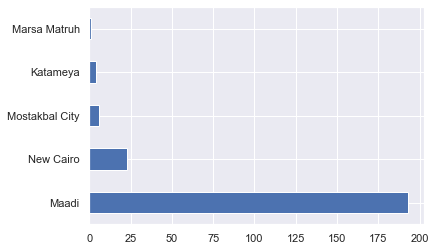

In [18]:
df['district'].value_counts().plot(kind='barh');

We need Maadi Only 

In [19]:
df=df[df['district']=='Maadi']

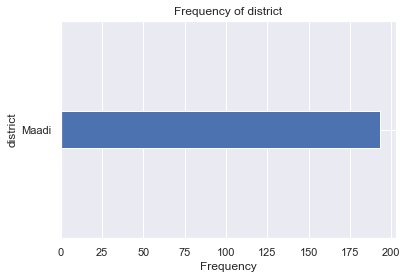

In [20]:
df['district'].value_counts().plot(kind='barh',width=0.1)
plt.xlabel('Frequency')
plt.ylabel('district')
plt.title('Frequency of district')
plt.show()

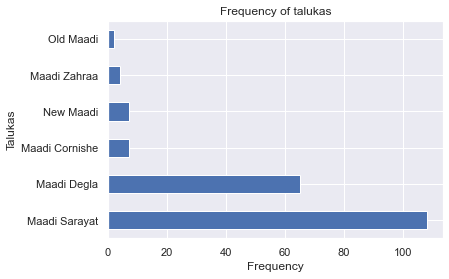

In [21]:
df['talukas'].value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Talukas')
plt.title('Frequency of talukas')
plt.show()

Old Maadi & Maadi Zahraa & Maadi Cornishe & New Maadi Will not help When applying ML Model will be Missclassified or will not choosed on Training Data set so it isn't useful enough we can drop it or we can take more data about it by it will take more time so we do this now by dropping this records

## So Limitations for this analysis are Maadi Degla and Maadi Sarayat only

In [22]:
df=df[df['talukas'].isin(['Old Maadi','Maadi Zahraa','Maadi Cornishe','New Maadi'])==False]

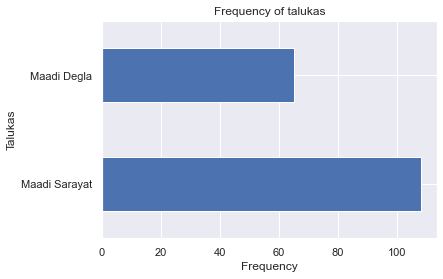

In [23]:
df['talukas'].value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Talukas')
plt.title('Frequency of talukas')
plt.show()

In [24]:
df['talukas'].value_counts()

Maadi Sarayat    108
Maadi Degla       65
Name: talukas, dtype: int64

In [25]:
df['finishing_level'].value_counts()

Semi Furnished      76
Furnished           47
Modern Furnished    27
Unfurnished         16
Finished             6
Semi Finished        1
Name: finishing_level, dtype: int64

New Limitation Semi Finished and Finished will not help us

Our Limitations are
Unfurnished ,Modern Furnished ,Furnished ,Semi Furnished

In [26]:
df=df[df['finishing_level'].isin(['Semi Finished','Finished'])==False]

In [27]:
df['properties'].value_counts()

Apartments       121
Ground Floors     19
Duplexes          14
Penthouses        13
Villas             4
Twin Houses        1
Name: properties, dtype: int64

New Limitation Villas and Twin Houses will not help us

Our Limitations are
Penthouses ,Duplexes ,Ground Floors ,Apartments

In [28]:
df=df[df['properties'].isin(['Villas','Twin Houses'])==False]

## Numerical Columns

In [29]:
Numerical_Columns=[]
for _ in df.columns:
    if df[_].dtype=='int':
        Numerical_Columns.append(_)

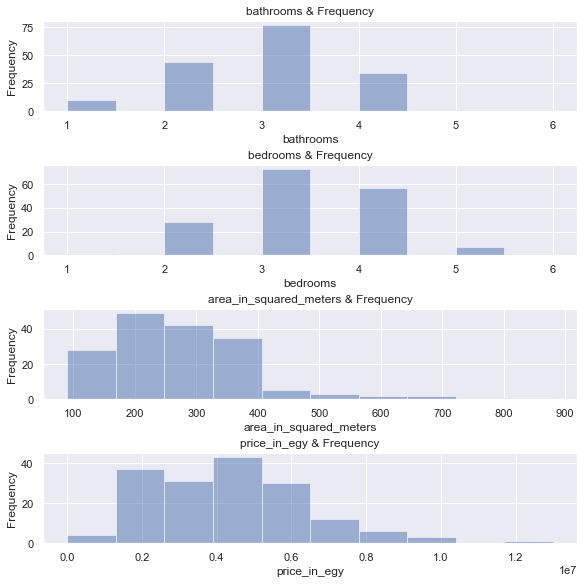

In [30]:
fig,ax=plt.subplots(len(Numerical_Columns),1,figsize=(8,8),constrained_layout=True)
for _,_1 in zip(Numerical_Columns,ax):
    _1.hist(df[_],alpha=0.5)
    _1.set_xlabel(_)
    _1.set_ylabel('Frequency')
    _1.set_title(f"{_} & Frequency")


On Prices,area Column there are few Outliers I can Drop them 

In [31]:
First ,third=df['price_in_egy'].quantile(0.25),df['price_in_egy'].quantile(0.75)
IQR=1.5*(third-First)
low=First-IQR
high=third+IQR

In [32]:
First1 ,third1=df['area_in_squared_meters'].quantile(0.25),df['area_in_squared_meters'].quantile(0.75)
IQR1=1.5*(third-First)
low1=First-IQR
high1=third+IQR

In [33]:
df=df[(df['price_in_egy']<=high)&(df['price_in_egy']>=low)]

In [34]:
df=df[(df['area_in_squared_meters']<=high1)&(df['area_in_squared_meters']>=low1)]

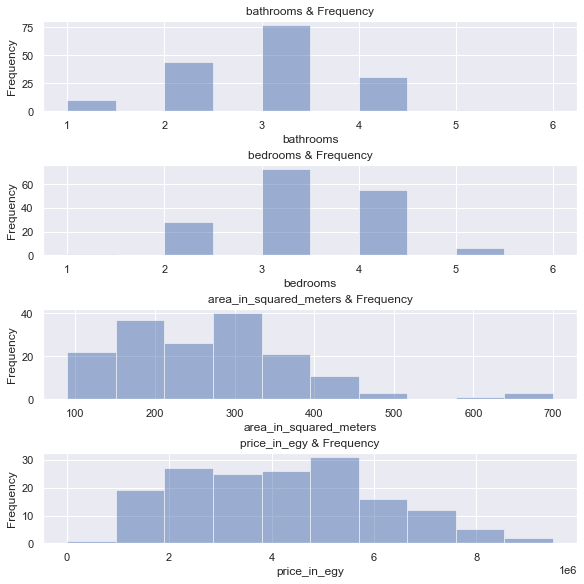

In [35]:
fig,ax=plt.subplots(len(Numerical_Columns),1,figsize=(8,8),constrained_layout=True)
for _,_1 in zip(Numerical_Columns,ax):
    _1.hist(df[_],alpha=0.5)
    _1.set_xlabel(_)
    _1.set_ylabel('Frequency')
    _1.set_title(f"{_} & Frequency")


# Bivariate Analysis

In [36]:
X=df.drop('price_in_egy',axis=1)
y=df['price_in_egy']
Num_Columns=[]
Cat_Columns=[]
for _ in X.columns:
    if X[_].dtype=='int':
        Num_Columns.append(_)
    else :
        Cat_Columns.append(_)

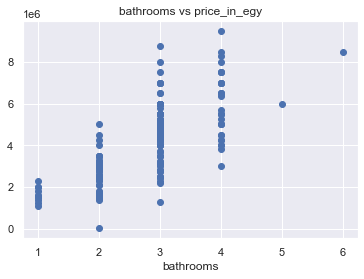

In [37]:
plt.scatter(df[Num_Columns[0]],df['price_in_egy'])
plt.xlabel('bathrooms')
plt.title('bathrooms vs price_in_egy')
plt.show()

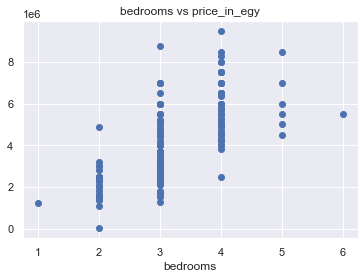

In [38]:
plt.scatter(df[Num_Columns[1]],df['price_in_egy'])
plt.xlabel('bedrooms')
plt.title('bedrooms vs price_in_egy')
plt.show()

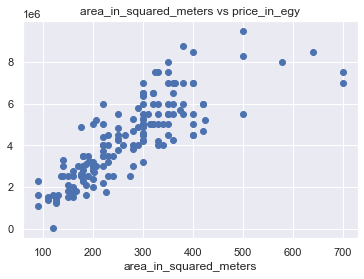

In [39]:
plt.scatter(df[Num_Columns[2]],df['price_in_egy'])
plt.xlabel('area_in_squared_meters')
plt.title('area_in_squared_meters vs price_in_egy')
plt.show()

Now it's pretty, good views,normal data and positive correlations between label and features

# ML

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer,mean_squared_error

In [41]:
df[Num_Columns]

,bathrooms,bedrooms,area_in_squared_meters
0,3,5,320
1,3,5,700
2,3,3,220
4,2,2,190
5,3,3,300
...,...,...,...
221,2,3,165
222,2,3,225
223,2,3,185
224,3,4,400


In [42]:
df[Cat_Columns]

,properties,finishing_level,district,talukas
0,Apartments,Semi Furnished,Maadi,Maadi Degla
1,Penthouses,Semi Furnished,Maadi,Maadi Degla
2,Apartments,Furnished,Maadi,Maadi Sarayat
4,Apartments,Modern Furnished,Maadi,Maadi Degla
5,Ground Floors,Semi Furnished,Maadi,Maadi Sarayat
...,...,...,...,...
221,Apartments,Furnished,Maadi,Maadi Degla
222,Apartments,Furnished,Maadi,Maadi Degla
223,Apartments,Furnished,Maadi,Maadi Degla
224,Duplexes,Semi Furnished,Maadi,Maadi Degla


In [43]:
Num_trans=Pipeline([('Scaling',StandardScaler())])
Cat_trans=Pipeline([('OneHotEncoding',OneHotEncoder(drop='first'))])

In [44]:
Preprocessing=ColumnTransformer([('cat',Cat_trans,Cat_Columns),('num',Num_trans,Num_Columns)])

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

# BaseLine Model

In [46]:
baseline=mean_squared_error(y_train,[y_train.mean()]*len(y_train))
baseline

3710791557018.822

In [47]:
from sklearn.linear_model import Ridge

In [48]:
mse=make_scorer(mean_squared_error)

In [49]:
model=Pipeline([('Transformation',Preprocessing),('model',Ridge())])

In [50]:
cv=cross_val_score(model,X_train,y_train,cv=4,n_jobs=-1,scoring=mse)

In [51]:
msq_cv=np.mean(cv)

In [52]:
model.fit(X_train,y_train)

Pipeline(steps=[('Transformation',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['properties',
                                                   'finishing_level',
                                                   'district', 'talukas']),
                                                 ('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'area_in_squared_meters'])])),
                ('model', Ridge())])

In [53]:
train_msq=mean_squared_error(y_train,model.predict(X_train))

# Evaluate 

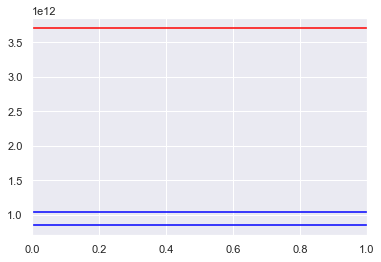

In [54]:
plt.axhline(baseline,color='red')
plt.axhline(train_msq,color='blue')
plt.axhline(msq_cv,color='blue')
plt.show()

Our Model Performs well 
cross validation and training msq are less than Baseline Model

# Predict

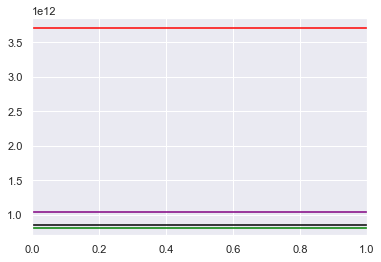

In [55]:
plt.axhline(baseline,color='red')
plt.axhline(train_msq,color='black')
plt.axhline(msq_cv,color='purple')
plt.axhline(mean_squared_error(y_test,model.predict(X_test)),color='green')
plt.show()

Testset also perform very well 

# tunning our model

In [56]:
param_grid=dict(model__alpha=[0.00001,0.0001,0.001,0.01,0.1])
GS=GridSearchCV(model,param_grid=param_grid,scoring=mse,n_jobs=-1)
GS.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('Transformation',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('OneHotEncoding',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['properties',
                                                                          'finishing_level',
                                                                          'district',
                                                                          'talukas']),
                                                                        ('num',
                                                                         Pipeline(steps=[('Scaling',
                                                                                          StandardScaler())]),
                                                                         ['bathrooms',
                                                                          'bedrooms',
                                                                          'area_in_squared_meters'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring=make_scorer(mean_squared_error))

In [57]:
GS.best_params_

{'model__alpha': 1e-05}

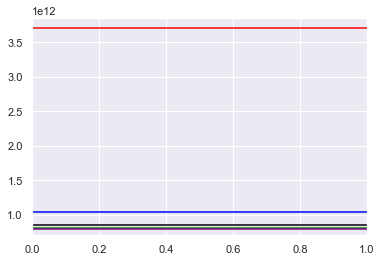

In [58]:
plt.axhline(baseline,color='red')
plt.axhline(train_msq,color='black')
plt.axhline(msq_cv,color='blue')
plt.axhline(mean_squared_error(y_test,model.predict(X_test)),color='green')
plt.axhline(mean_squared_error(y_test,GS.predict(X_test)),color='purple')

plt.show()

In [59]:
mean_squared_error(y_test,GS.predict(X_test))<mean_squared_error(y_test,model.predict(X_test))

True

In [60]:
df1=pd.DataFrame({'predicts':GS.predict(X_test),'actual_values':y_test})

In [61]:
import seaborn as sns

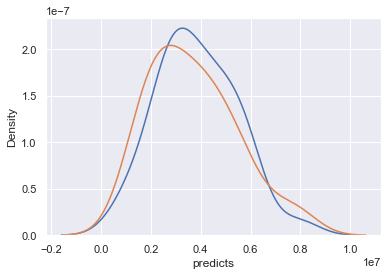

In [62]:
ax=sns.kdeplot(df1['predicts'])
sns.kdeplot(df1['actual_values'],ax=ax)
plt.show()

# Check For Multicolinearity

In [63]:
VIFS=pd.get_dummies(X,drop_first=True)

In [64]:
VIFS['intercept']=1

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = VIFS.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(VIFS.values, i)
                          for i in range(len(VIFS.columns))]
  

In [66]:
vif_data

,feature,VIF
0,bathrooms,2.007949
1,bedrooms,2.534561
2,area_in_squared_meters,3.907415
3,properties_Duplexes,1.213610
4,properties_Ground Floors,1.264086
5,properties_Penthouses,1.739306
6,finishing_level_Furnished,7.530195
7,finishing_level_Modern Furnished,5.317387
8,finishing_level_Semi Furnished,8.251794
9,finishing_level_Unfurnished,3.386862


baseline 10 

no multicolinearity

# Thank you 

Limitations :

Maadi Degla and Maadi Sarayat

Penthouses ,Duplexes ,Ground Floors ,Apartments

Unfurnished ,Modern Furnished ,Furnished ,Semi Furnished